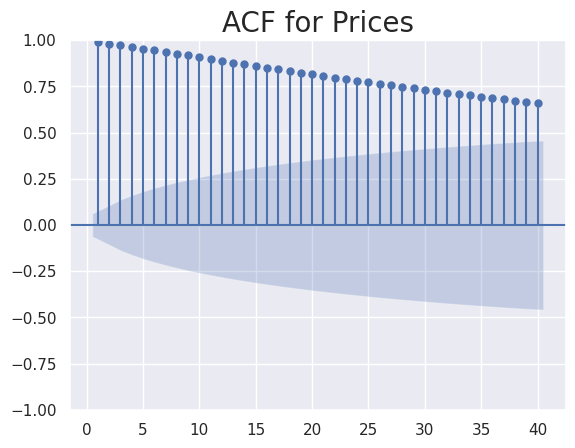

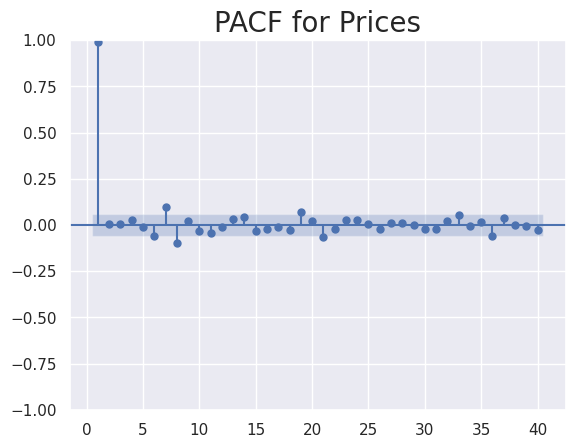

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  996
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5742.786
Date:                Fri, 13 Oct 2023   AIC                          11491.571
Time:                        19:00:13   BIC                          11506.282
Sample:                    12-03-2018   HQIC                         11497.164
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6955.0483    272.599     25.514      0.000    6420.765    7489.332
ar.L1          0.9896      0.003    295.325      0.000       0.983       0.996
sigma2      5942.8949    122.273     48.604      0.0

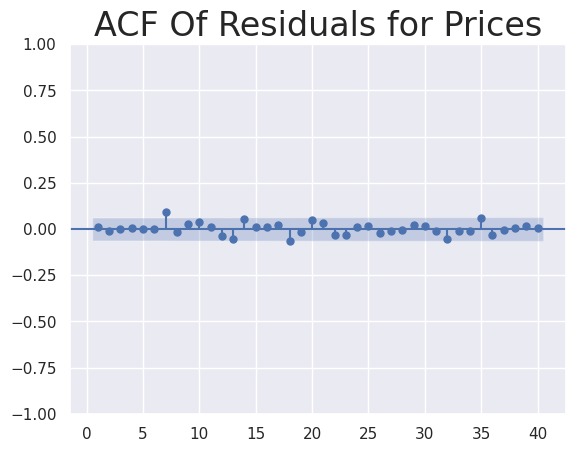

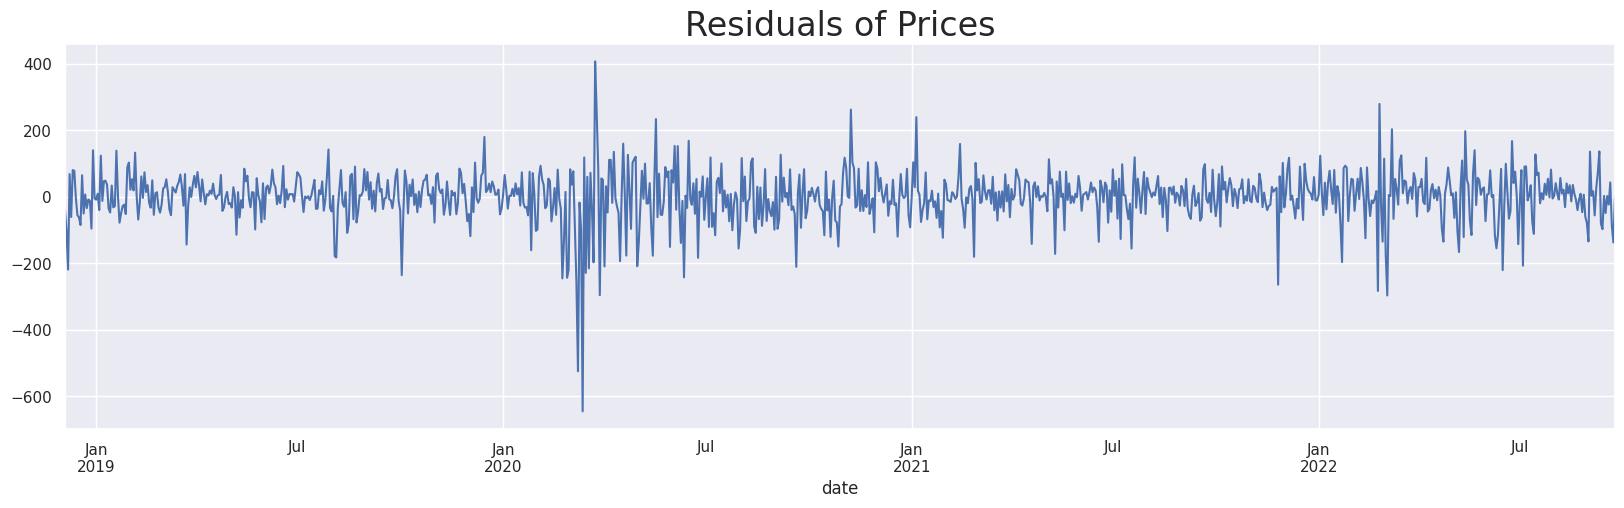

In [ ]:
#Importando los paquetes relevantes
#Pandas (pd): Importa la biblioteca Pandas para el manejo de datos tabulares.
#NumPy (np): Importa la biblioteca NumPy para operaciones numéricas eficientes.
#Matplotlib (plt): Importa Matplotlib y su módulo pyplot para crear gráficos.
#Statsmodels Graphics (sgt): Importa Statsmodels Graphics para gráficos de series de tiempo.
#ARIMA (from ARIMA import ARIMA): Importa la clase ARIMA de Statsmodels para el modelado de series de tiempo.
#Distribución Chi-cuadrado: Importa la distribución chi-cuadrado de SciPy para pruebas estadísticas.
#Statsmodels Stattools (sts): Importa Statsmodels Stattools para pruebas y análisis estadístico de series de tiempo.
#Seaborn (sns): Importa Seaborn para crear visualizaciones de datos más atractivas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

#Importación de datos y preprocesamiento
#raw_csv_data = pd.read_csv("df_comp.csv"): Carga datos desde un archivo CSV a un DataFrame de Pandas.
#df_comp=raw_csv_data.copy(): Crea una copia del DataFrame original para preservar los datos sin cambios.
#df_comp.date = pd.to_datetime(df_comp.date, format='%Y-%m-%d', dayfirst=True): Convierte la columna de fechas en formato datetime, especificando el formato 'año-mes-día' y considerando el día primero.
#df_comp.set_index("date", inplace=True): Establece la columna de fechas como el índice del DataFrame.
#df_comp=df_comp.asfreq('b'): Asegura que las fechas sigan una frecuencia de días laborables (lunes a viernes).
#df_comp = df_comp.ffill(): Rellena los valores faltantes hacia adelante en el DataFrame.
#df_comp['market_value']=df_comp.ftse: Crea una nueva columna llamada 'market_value' con los datos de la columna 'ftse'.
raw_csv_data = pd.read_csv("df_comp.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format='%Y-%m-%d', dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp['market_value']=df_comp.ftse
del df_comp['spx ']
del df_comp[' dax ']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#La ACF
#sgt.plot_acf(df.market_value, zero=False, lags=40): Genera un gráfico de la función de autocorrelación (ACF) para la serie de tiempo en 'df.market_value' con un máximo de 40 rezagos, excluyendo el rezago cero.
#plt.title("ACF for Prices", size=20): Establece un título al gráfico con un tamaño de fuente de 20.
#plt.show(): Muestra el gráfico.
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

#La PACF
#import warnings: Importa la biblioteca 'warnings', que permite controlar las advertencias generadas por el código.
#warnings.filterwarnings("ignore"): Configura el sistema para ignorar todas las advertencias, evitando que se muestren en la salida. Esto puede ser útil para evitar mensajes no deseados durante la ejecución del código.
import warnings
warnings.filterwarnings("ignore")

#El modelo AR (1)
#sgt.plot_pacf(df.market_value, lags=40, alpha=0.05, zero=False, method=('ols')):Genera un gráfico de la función de autocorrelación parcial (PACF) para la serie de tiempo.
#plt.title("PACF for Prices", size=20): Establece un título para el gráfico.
#plt.show(): Muestra el gráfico.
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

#Higher-Lag AR Models
#Creamos un modelo ARIMA con un orden específico para la serie de tiempo de los valores de mercado.
#Ajustamos el modelo ARIMA a los datos y almacena los resultados.
#Imprimimos un resumen de las estadísticas del modelo.
model_ar = ARIMA(df.market_value, order=(1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())

#LLR Test
#Realizamos una prueba de razón de verosimilitud (LLR) entre dos modelos y devuelve el valor p que indica si uno es significativamente mejor que el otro en términos de ajuste.
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

#Comparación de Higher-Lag AR Models
#Estos códigos realizan pruebas de razón de verosimilitud (LLR) entre varios modelos ARIMA de orden
#creciente, lo que permite evaluar si modelos más complejos son significativamente mejores en el ajuste de los datos que modelos más simples. Los valores p
#resultantes indican si el modelo más complejo es estadísticamente mejor.

LLR_test(model_ar_2, model_ar_3)

LLR_test(model_ar_3, model_ar_4)

model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

#Analizando los residuos
#El código realiza un análisis de los residuos (errores) de un modelo ARIMA(7,0,0) aplicado a una serie temporal de datos financieros. El análisis incluye la evaluación de la media y la varianza de los residuos, una prueba de estacionariedad de los
#residuos, un gráfico de autocorrelación de los residuos y un gráfico de los propios residuos. Este análisis de residuos es fundamental para evaluar si el modelo ARIMA es adecuado para los datos y
#si los residuos se comportan como ruido blanco, lo que es importante en el análisis de series temporales.
df['res_price'] = results_ar_7.resid
df.res_price.mean()
df.res_price.var()
sts.adfuller(df.res_price)
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()